In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
def model_train(model, x, y):
    max_epoch = 2000
    array_epo, array_loss, gradient_array = [], [], []

    for epoch in range(1, max_epoch + 1):
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        array_epo.append(epoch)
        array_loss.append(loss.detach().numpy())

        grad_norm = sum(torch.norm(p.grad).item()**2 for p in model.parameters() if p.grad is not None)**0.5
        gradient_array.append(grad_norm)

        if epoch % 100 == 0:
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')

        if epoch > 5 and array_loss[-1] < 0.001:
            if abs(array_loss[-3] - array_loss[-2]) < 1.0e-05 and abs(array_loss[-2] - array_loss[-1]) < 1.0e-05:
                print("Convergence reached for loss:", array_loss[-1])
                break

    return array_epo, array_loss, prediction, gradient_array


In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(1, 4)
        self.l2 = nn.Linear(4, 9)
        self.l3 = nn.Linear(9, 12)
        self.l4 = nn.Linear(12, 10)
        self.l5 = nn.Linear(10, 10)
        self.l6 = nn.Linear(10, 10)
        self.l7 = nn.Linear(10, 4)
        self.l8 = nn.Linear(4, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.l1(x))
        x = nn.functional.leaky_relu(self.l2(x))
        x = nn.functional.leaky_relu(self.l3(x))
        x = nn.functional.leaky_relu(self.l4(x))
        x = nn.functional.leaky_relu(self.l5(x))
        x = nn.functional.leaky_relu(self.l6(x))
        x = nn.functional.leaky_relu(self.l7(x))
        x = self.l8(x)

        return x


(300, 1)
(300, 1)


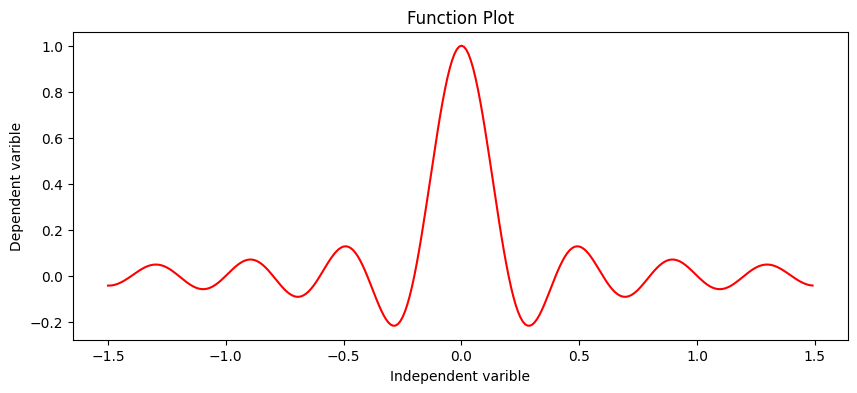

In [4]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
print(x.shape)
y = np.sinc(5*x)
print(y.shape)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [5]:
m_1 = Model()
optimizer = torch.optim.Adam(m_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in m_1.parameters())
print(pytorch_total_params)
m1_array_epoch, m1_array_loss, m1_predic, m1_array_gradient = model_train(m_1, x, y)

572
epoch: 100, loss = 0.0612
epoch: 200, loss = 0.0539
epoch: 300, loss = 0.0054
epoch: 400, loss = 0.0042
epoch: 500, loss = 0.0035
epoch: 600, loss = 0.0026
epoch: 700, loss = 0.0023
epoch: 800, loss = 0.0022
epoch: 900, loss = 0.0022
epoch: 1000, loss = 0.0022
epoch: 1100, loss = 0.0022
epoch: 1200, loss = 0.0022
epoch: 1300, loss = 0.0021
epoch: 1400, loss = 0.0021
epoch: 1500, loss = 0.0021
epoch: 1600, loss = 0.0021
epoch: 1700, loss = 0.0021
epoch: 1800, loss = 0.0021
epoch: 1900, loss = 0.0021
epoch: 2000, loss = 0.0021


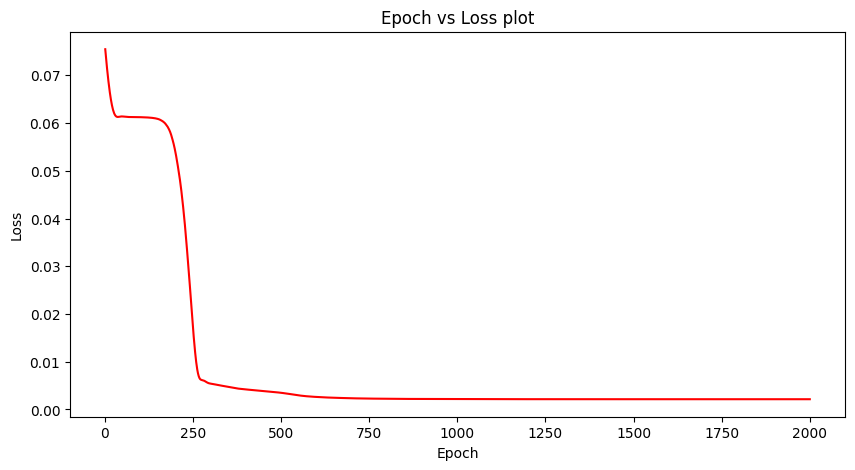

In [10]:

plt.figure(figsize=(10,5))
plt.plot(m1_array_epoch, m1_array_loss, color = "red")
plt.title('Epoch vs Loss plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

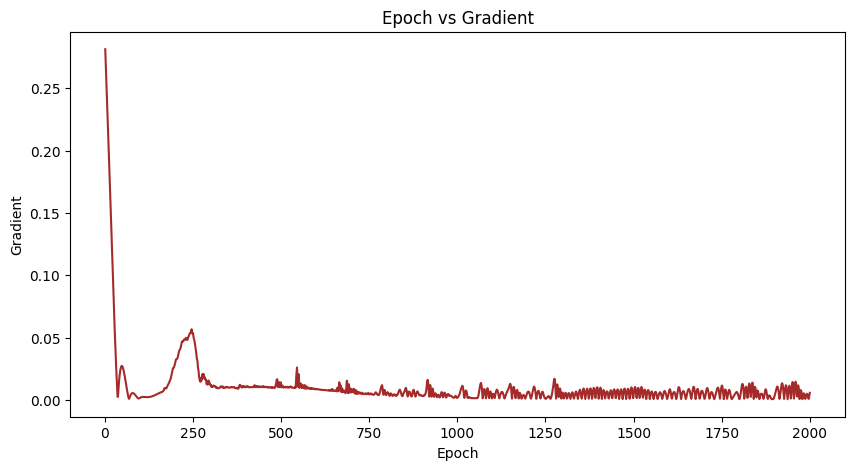

In [11]:
plt.figure(figsize=(10,5))
plt.plot(m1_array_epoch, m1_array_gradient, color = "brown")
plt.title('Epoch vs Gradient')
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.show()

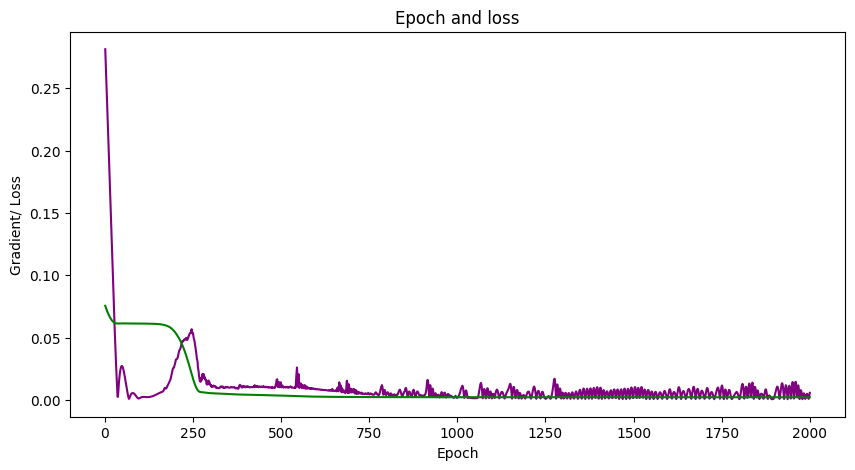

In [12]:
plt.figure(figsize=(10,5))
plt.plot(m1_array_epoch, m1_array_gradient, color = "purple")
plt.plot(m1_array_epoch, m1_array_loss, color = "green")
plt.title('Epoch and loss')
plt.xlabel('Epoch')
plt.ylabel('Gradient/ Loss')
plt.show()